In [1]:
import os
import psycopg2

def getConnection():

    # Connect to postgres with a copy of the MIMIC-III database
    con = psycopg2.connect(
        dbname=os.environ['POSTGRES_DB_NAME'],
        user=os.environ['POSTGRES_USER_NAME'],
        host=os.environ['POSTGRES_HOSTNAME'],
        port=os.environ['POSTGRES_PORT_NUMBER'],
        password=os.environ['POSTGRES_PASSWORD']
        )

    return con

In [3]:
import pandas as pd


con = getConnection()
labsConceptsDf = pd.read_sql_query("select * from eicu_etl_20231106.src_labevents limit 5", con)
# labsConceptsDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/concept_mapping/concepts_labs.csv', index=False)
labsConceptsDf

/tmp/ipykernel_69201/3133958785.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  labsConceptsDf = pd.read_sql_query("select * from eicu_etl_20231106.src_labevents limit 5", con)


,labevent_id,patient_id,episode_id,specimen_id,itemid,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,load_table_id,load_row_id,trace_id
0,232746720,None,1000114,None,potassium,-18395,None,3.7,3.7,mmol/L,None,None,None,None,None,labevents,-1990878364,"{'charttime': '-18395', 'episode_id': '1000114..."
1,232746721,None,1000114,None,creatinine,-18395,None,1.50,1.5,mg/dL,None,None,None,None,None,labevents,-53267179,"{'charttime': '-18395', 'episode_id': '1000114..."
2,232746722,None,1000114,None,anion gap,-18395,None,7,7.0,NaN,None,None,None,None,None,labevents,-1350855935,"{'charttime': '-18395', 'episode_id': '1000114..."
3,232746723,None,1000114,None,sodium,-18395,None,137,137.0,mmol/L,None,None,None,None,None,labevents,-231407629,"{'charttime': '-18395', 'episode_id': '1000114..."
4,232746724,None,1000114,None,bicarbonate,-18395,None,24,24.0,mmol/L,None,None,None,None,None,labevents,-1788604847,"{'charttime': '-18395', 'episode_id': '1000114..."


In [52]:
import os
import pandas as pd


df = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_systolic_agg.csv''')
df

,patientunitstayid,observationday,mean,min,max,std,first,last
0,141168,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,141168,1.0,92.707317,40.0,122.0,23.728932,40.0,88.0
2,141178,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,141179,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,141179,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
623490,3353251,9.0,NaN,NaN,NaN,NaN,NaN,NaN
623491,3353251,10.0,NaN,NaN,NaN,NaN,NaN,NaN
623492,3353251,11.0,NaN,NaN,NaN,NaN,NaN,NaN
623493,3353254,0.0,NaN,NaN,NaN,NaN,NaN,NaN


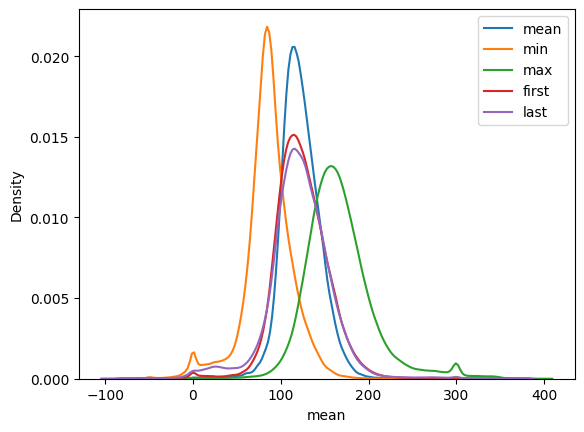

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = plt.axes()
sns.kdeplot(df, x="mean", ax=ax, label="mean")
sns.kdeplot(df, x="min", ax=ax, label="min")
sns.kdeplot(df, x="max", ax=ax, label="max")
sns.kdeplot(df, x="first", ax=ax, label="first")
sns.kdeplot(df, x="last", ax=ax, label="last")
# sns.kdeplot(df, x="std", ax=ax, label="std")

plt.legend()
plt.show()

In [54]:
import os
import pandas as pd


df = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_diastolic_agg.csv''')
df

,patientunitstayid,observationday,mean,min,max,std,first,last
0,141168,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,141168,1.0,51.0,17.0,84.0,16.731706,18.0,54.0
2,141178,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,141179,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,141179,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
623490,3353251,9.0,NaN,NaN,NaN,NaN,NaN,NaN
623491,3353251,10.0,NaN,NaN,NaN,NaN,NaN,NaN
623492,3353251,11.0,NaN,NaN,NaN,NaN,NaN,NaN
623493,3353254,0.0,NaN,NaN,NaN,NaN,NaN,NaN


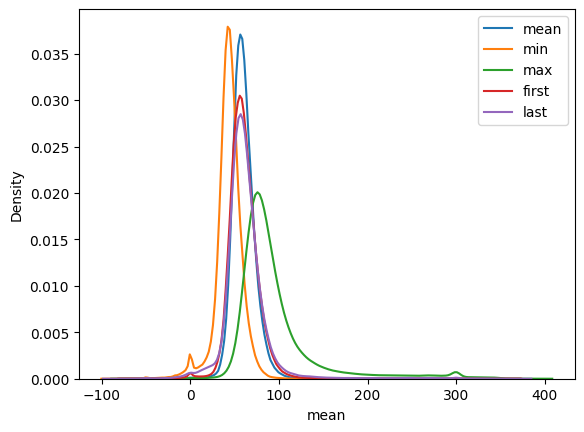

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = plt.axes()
sns.kdeplot(df, x="mean", ax=ax, label="mean")
sns.kdeplot(df, x="min", ax=ax, label="min")
sns.kdeplot(df, x="max", ax=ax, label="max")
sns.kdeplot(df, x="first", ax=ax, label="first")
sns.kdeplot(df, x="last", ax=ax, label="last")

plt.legend()
plt.show()

In [56]:
import os
import pandas as pd


df = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_mean_agg.csv''')
df

,patientunitstayid,observationday,mean,min,max,std,first,last
0,141168,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,141168,1.0,70.585366,28.0,159.0,23.523367,28.0,70.0
2,141178,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,141179,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,141179,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
623490,3353251,9.0,NaN,NaN,NaN,NaN,NaN,NaN
623491,3353251,10.0,NaN,NaN,NaN,NaN,NaN,NaN
623492,3353251,11.0,NaN,NaN,NaN,NaN,NaN,NaN
623493,3353254,0.0,NaN,NaN,NaN,NaN,NaN,NaN


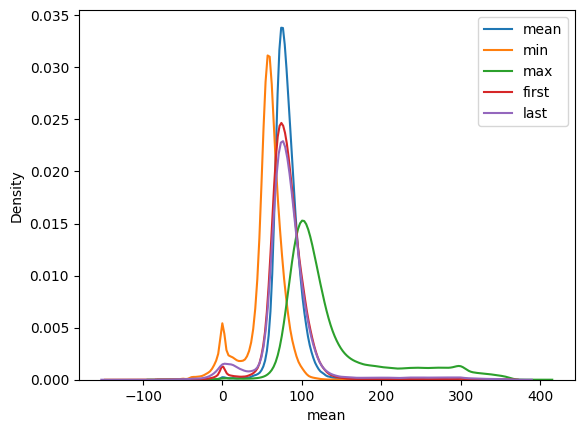

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = plt.axes()
sns.kdeplot(df, x="mean", ax=ax, label="mean")
sns.kdeplot(df, x="min", ax=ax, label="min")
sns.kdeplot(df, x="max", ax=ax, label="max")
sns.kdeplot(df, x="first", ax=ax, label="first")
sns.kdeplot(df, x="last", ax=ax, label="last")

plt.legend()
plt.show()

In [58]:
import os
import pandas as pd


df = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_temperature_agg.csv''')
df = df[df['min'] < 100]
df = df[df['min'] > -100]
df

,patientunitstayid,observationday,mean,min,max,std,first,last
19,141233,2.0,36.600000,36.60,36.6,0.000000,36.60,36.60
39,141266,0.0,37.827344,37.40,38.0,0.157288,37.40,37.70
41,141276,0.0,35.285714,33.70,35.9,0.802971,33.70,35.90
58,141314,0.0,34.637607,31.80,35.8,1.149792,35.40,31.80
64,141340,1.0,36.545918,35.60,37.2,0.425932,37.15,36.80
...,...,...,...,...,...,...,...,...
623409,3353197,0.0,37.215530,36.85,37.5,0.125724,37.10,36.85
623428,3353197,19.0,36.787500,36.70,36.9,0.083452,36.90,36.70
623481,3353251,0.0,32.839649,32.20,34.2,0.328473,34.20,32.90
623482,3353251,1.0,35.957639,32.90,37.1,1.320019,32.90,37.00


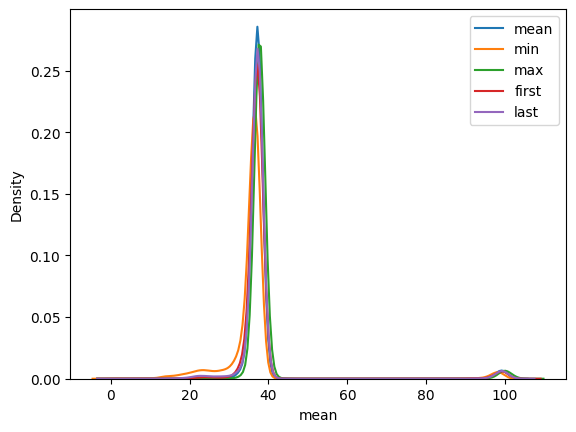

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = plt.axes()
sns.kdeplot(df, x="mean", ax=ax, label="mean")
sns.kdeplot(df, x="min", ax=ax, label="min")
sns.kdeplot(df, x="max", ax=ax, label="max")
sns.kdeplot(df, x="first", ax=ax, label="first")
sns.kdeplot(df, x="last", ax=ax, label="last")

plt.legend()
plt.show()

In [60]:
import os
import pandas as pd


df = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_sao2_agg.csv''')
df

,patientunitstayid,observationday,mean,min,max,std,first,last
0,141168,0.0,86.741935,53.0,99.0,10.388993,93.0,93.0
1,141168,1.0,86.103448,36.0,100.0,14.387726,94.0,97.0
2,141178,0.0,92.000000,92.0,92.0,NaN,92.0,92.0
3,141179,0.0,98.747253,93.0,100.0,1.539072,93.0,96.0
4,141179,1.0,96.000000,96.0,96.0,NaN,96.0,96.0
...,...,...,...,...,...,...,...,...
623490,3353251,9.0,95.704861,91.0,99.0,1.159588,97.0,92.0
623491,3353251,10.0,95.323944,79.0,99.0,2.589867,97.0,98.0
623492,3353251,11.0,91.737500,52.0,100.0,9.032632,99.0,96.0
623493,3353254,0.0,98.321429,92.0,100.0,1.994938,95.0,98.0


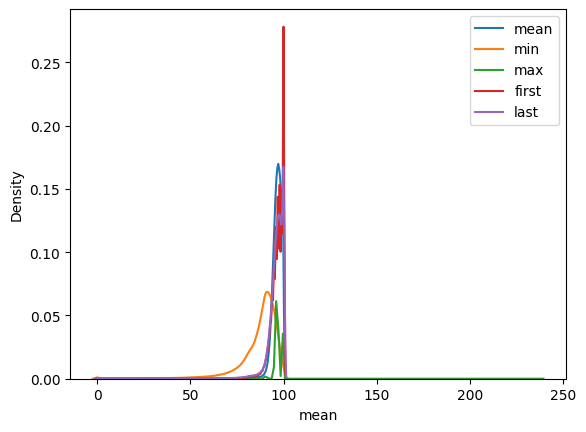

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = plt.axes()
sns.kdeplot(df, x="mean", ax=ax, label="mean")
sns.kdeplot(df, x="min", ax=ax, label="min")
sns.kdeplot(df, x="max", ax=ax, label="max")
sns.kdeplot(df, x="first", ax=ax, label="first")
sns.kdeplot(df, x="last", ax=ax, label="last")

plt.legend()
plt.show()

In [62]:
import os
import pandas as pd


df = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_heartrate_agg.csv''')
df

,patientunitstayid,observationday,mean,min,max,std,first,last
0,141168,0.0,125.052830,78.0,140.0,11.548852,140.0,80.0
1,141168,1.0,85.450980,62.0,104.0,11.024459,80.0,100.0
2,141178,0.0,88.000000,88.0,88.0,NaN,88.0,88.0
3,141179,0.0,92.331010,78.0,110.0,6.786338,82.0,90.0
4,141179,1.0,88.289720,76.0,108.0,7.668865,82.0,96.0
...,...,...,...,...,...,...,...,...
623490,3353251,9.0,76.291667,68.0,84.0,3.966541,78.0,68.0
623491,3353251,10.0,69.972222,63.0,79.0,3.084059,68.0,66.0
623492,3353251,11.0,68.362500,62.0,74.0,2.398543,62.0,70.0
623493,3353254,0.0,76.178571,72.0,83.0,2.820581,75.0,82.0


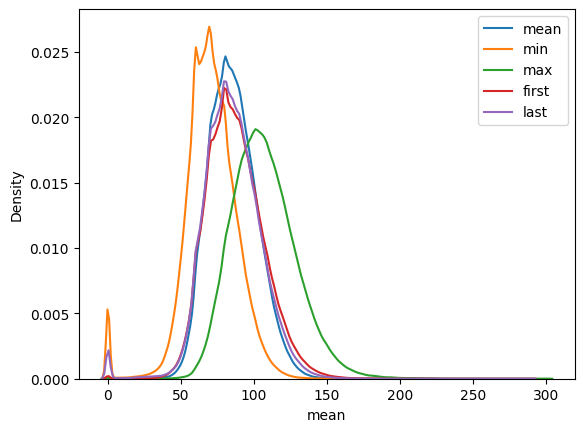

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = plt.axes()
sns.kdeplot(df, x="mean", ax=ax, label="mean")
sns.kdeplot(df, x="min", ax=ax, label="min")
sns.kdeplot(df, x="max", ax=ax, label="max")
sns.kdeplot(df, x="first", ax=ax, label="first")
sns.kdeplot(df, x="last", ax=ax, label="last")

plt.legend()
plt.show()

In [64]:
import os
import pandas as pd


df = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_respiration_agg.csv''')
df = df[df['min'] < 100]

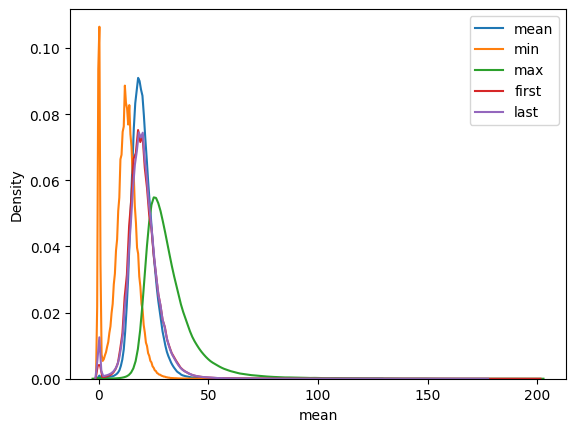

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = plt.axes()
sns.kdeplot(df, x="mean", ax=ax, label="mean")
sns.kdeplot(df, x="min", ax=ax, label="min")
sns.kdeplot(df, x="max", ax=ax, label="max")
sns.kdeplot(df, x="first", ax=ax, label="first")
sns.kdeplot(df, x="last", ax=ax, label="last")

plt.legend()
plt.show()

In [8]:
import os
import pandas as pd


df = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_mean.temp.csv''', header=None)

In [10]:
df.columns = ['vitalperiodicid', 'patientunitstayid', 'observationoffset', 'vitalname', 'value']
df

,vitalperiodicid,patientunitstayid,observationoffset,vitalname,value
0,58272862,141194,761,sa02,54.0
1,61560839,141194,1906,sa02,76.0
2,58969153,141194,781,sa02,52.0
3,62555070,141194,3181,sa02,NaN
4,59051412,141194,786,sa02,54.0
...,...,...,...,...,...
955,62936656,141194,4006,sa02,NaN
956,61851143,141194,2541,sa02,NaN
957,62968432,141194,4061,sa02,NaN
958,62956383,141194,4036,sa02,NaN


In [17]:
import numpy as np


df['observationday'] = np.floor(df.observationoffset/(60*24))

In [18]:
df

,vitalperiodicid,patientunitstayid,observationoffset,vitalname,value,observationday
0,58272862,141194,761,sa02,54.0,0.0
1,61560839,141194,1906,sa02,76.0,1.0
2,58969153,141194,781,sa02,52.0,0.0
3,62555070,141194,3181,sa02,NaN,2.0
4,59051412,141194,786,sa02,54.0,0.0
...,...,...,...,...,...,...
955,62936656,141194,4006,sa02,NaN,2.0
956,61851143,141194,2541,sa02,NaN,1.0
957,62968432,141194,4061,sa02,NaN,2.0
958,62956383,141194,4036,sa02,NaN,2.0


In [23]:
df[df.observationday == 1].notna().sum()

vitalperiodicid      288
patientunitstayid    288
observationoffset    288
vitalname            288
value                188
observationday       288
dtype: int64

In [24]:
df[df.observationday == 1].value.sum()/df[df.observationday == 1].value.count()

72.89893617021276

In [27]:
df[df.observationday == 1].value.min()

44.0

In [28]:
df[df.observationday == 1].value.max()

292.0

In [30]:
df[df.observationday == 1].value.std()

25.03890873688132

In [31]:
df[df.observationday == 1]

,vitalperiodicid,patientunitstayid,observationoffset,vitalname,value,observationday
1,61560839,141194,1906,sa02,76.0,1.0
5,61708682,141194,2226,sa02,67.0,1.0
6,61840089,141194,2506,sa02,NaN,1.0
9,61509813,141194,1806,sa02,52.0,1.0
13,61541179,141194,1866,sa02,76.0,1.0
...,...,...,...,...,...,...
948,61845145,141194,2521,sa02,NaN,1.0
950,61864225,141194,2566,sa02,NaN,1.0
952,61861541,141194,2561,sa02,NaN,1.0
954,61882368,141194,2601,sa02,NaN,1.0


In [53]:
df[df.observationday == 0].sort_values('observationoffset', ascending=True)[120:140]

,vitalperiodicid,patientunitstayid,observationoffset,vitalname,value,observationday
721,63970195,141194,606,sa02,NaN,0.0
705,63972949,141194,611,sa02,NaN,0.0
676,63975397,141194,616,sa02,NaN,0.0
729,63976247,141194,621,sa02,NaN,0.0
737,63978528,141194,626,sa02,NaN,0.0
664,63980002,141194,631,sa02,NaN,0.0
688,63982562,141194,636,sa02,NaN,0.0
761,63985466,141194,641,sa02,NaN,0.0
781,63988123,141194,646,sa02,NaN,0.0
769,63990537,141194,651,sa02,NaN,0.0


## Investigating the poor performance of mortality prediction models

In [10]:
import os
import pandas as pd


dataDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/final/data_matrix.csv')
dataDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,systemic_mean_avg,systemic_diastolic_avg,systemic_systolic_avg,respiration_avg,heartrate_avg,...,Red blood cell count_last,Calcium level_last,MCV - Mean corpuscular volume_last,MCHC - Mean corpuscular haemoglobin concentration_last,MCH - Mean corpuscular haemoglobin_last,White blood cell count_last,Red blood cell distribution width_last,Glucose level_last,Bicarbonate level_last,Anion gap_last
0,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
1,275863,141751,2014-11-29,2014-11-28,0,82.732639,60.638889,120.218750,21.090278,103.961806,...,3.68,7.7,80.2,36.6,29.3,13.4,12.7,216.0,19.0,17.0
2,275863,141751,2014-12-01,2014-11-28,0,88.877193,67.184211,116.228070,20.728070,87.194118,...,3.31,8.1,81.3,35.7,29.0,13.5,13.8,115.0,23.0,10.0
3,238284,141959,2014-01-24,2014-01-24,0,74.113636,47.795455,118.534091,19.254985,67.384615,...,3.63,7.4,88.2,31.6,27.8,12.4,14.6,233.0,27.0,14.0
4,238284,141959,2014-01-25,2014-01-24,0,80.972028,53.451049,126.541958,17.677260,79.479021,...,3.77,6.6,88.1,31.9,28.1,13.8,15.0,122.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19179,3516078,3352827,2015-07-22,2015-07-15,1,87.024007,63.609013,132.066452,15.968750,84.565972,...,2.62,9.0,93.0,32.0,30.0,12.2,15.0,206.0,33.0,8.0
19180,3516078,3352827,2015-07-23,2015-07-15,1,78.591413,59.196659,118.586644,17.927083,92.722222,...,2.73,9.0,93.0,32.0,30.0,11.2,15.2,165.0,33.0,8.0
19181,3516078,3352827,2015-07-31,2015-07-15,1,71.217135,49.538315,121.737472,20.833333,93.670139,...,2.69,9.1,92.0,33.0,30.0,11.8,17.5,167.0,27.0,7.0
19182,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0


In [11]:
dataDf = dataDf[(dataDf['measurement_date'] == dataDf['visit_start_date_adm'])]
dataDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,systemic_mean_avg,systemic_diastolic_avg,systemic_systolic_avg,respiration_avg,heartrate_avg,...,Red blood cell count_last,Calcium level_last,MCV - Mean corpuscular volume_last,MCHC - Mean corpuscular haemoglobin concentration_last,MCH - Mean corpuscular haemoglobin_last,White blood cell count_last,Red blood cell distribution width_last,Glucose level_last,Bicarbonate level_last,Anion gap_last
3,238284,141959,2014-01-24,2014-01-24,0,74.113636,47.795455,118.534091,19.254985,67.384615,...,3.6300,7.400,88.200,31.600,27.800,12.4000,14.600,233.00,27.00,14.00
15,216965,143466,2015-08-02,2015-08-02,0,64.473251,46.028807,105.362140,17.615385,82.696864,...,2.7900,7.600,92.100,33.900,30.700,16.5000,15.900,384.00,21.00,18.00
42,210052,151900,2014-11-02,2014-11-02,0,100.301716,74.995919,146.577504,16.000000,84.930314,...,3.5100,8.500,94.000,33.000,31.100,9.9000,15.000,276.00,24.00,20.00
45,226365,153141,2015-07-24,2015-07-24,0,82.201099,57.831397,135.413691,18.815331,87.937063,...,4.1600,8.200,93.500,33.400,31.300,5.2000,14.100,136.00,28.00,17.00
92,232664,160593,2014-09-19,2014-09-19,0,68.700000,48.080000,107.760000,27.500000,92.960000,...,3.3299,8.787,90.815,33.138,30.001,119.0671,16.445,163.64,26.54,11.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19122,3520751,3350292,2015-09-17,2015-09-17,0,82.977441,59.425045,129.875526,17.291228,88.814035,...,2.5200,7.900,95.000,32.000,31.000,12.2000,17.100,229.00,24.00,13.00
19148,3519950,3351084,2014-09-01,2014-09-01,0,96.279423,69.014644,148.467129,26.343434,78.679426,...,4.0800,8.100,94.000,34.000,32.000,14.3000,15.100,93.00,22.00,8.00
19150,3514610,3351413,2014-11-22,2014-11-22,0,75.720930,55.000000,115.709302,20.158470,76.450185,...,4.0600,7.400,80.000,31.000,25.000,17.1000,20.800,85.00,18.00,7.00
19157,3514610,3351414,2014-04-18,2014-04-18,0,84.615385,68.104895,116.940559,23.052265,100.756098,...,4.1100,7.300,90.000,33.000,30.000,16.9000,19.100,116.00,25.00,5.00


In [19]:
X = dataDf[["Sodium level_avg", "Blood urea nitrogen_avg", "Creatinine level_avg", "Potassium level_avg", "Chloride_avg", "Hematocrit_avg", "Haemoglobin estimation_avg", "Platelet count_avg", "Red blood cell count_avg", "Calcium level_avg", "MCV - Mean corpuscular volume_avg", "MCHC - Mean corpuscular haemoglobin concentration_avg", "MCH - Mean corpuscular haemoglobin_avg", "White blood cell count_avg", "Red blood cell distribution width_avg", "Glucose level_avg", "Bicarbonate level_avg", "Anion gap_avg"]]
X

,Sodium level_avg,Blood urea nitrogen_avg,Creatinine level_avg,Potassium level_avg,Chloride_avg,Hematocrit_avg,Haemoglobin estimation_avg,Platelet count_avg,Red blood cell count_avg,Calcium level_avg,MCV - Mean corpuscular volume_avg,MCHC - Mean corpuscular haemoglobin concentration_avg,MCH - Mean corpuscular haemoglobin_avg,White blood cell count_avg,Red blood cell distribution width_avg,Glucose level_avg,Bicarbonate level_avg,Anion gap_avg
3,132.500000,45.500000,2.175000,4.400000,99.500000,32.000000,10.100000,134.00,3.63000,7.300000,88.2000,31.600,27.8000,12.4000,14.600,175.000000,26.000000,11.500000
15,132.000000,28.000000,1.930000,4.800000,101.000000,25.900000,8.050000,196.50,2.66500,7.500000,91.3500,33.100,30.2000,12.9500,15.900,346.000000,20.000000,15.666667
42,134.500000,18.500000,1.040000,3.933333,100.500000,28.650000,9.600000,637.00,3.51000,8.050000,94.0000,33.000,31.1000,9.9000,15.000,207.500000,22.000000,16.000000
45,139.500000,4.000000,0.660000,3.300000,99.000000,36.100000,12.000000,132.00,3.87000,7.850000,93.2500,33.200,31.0000,5.0500,14.100,130.000000,28.000000,16.000000
92,140.011667,34.878167,1.538875,3.987167,105.318333,30.364667,10.049667,240.31,3.40655,8.764333,90.0985,33.085,29.8145,34.4651,16.049,130.358333,24.076833,12.049500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19122,131.000000,26.000000,3.490000,3.800000,94.000000,24.000000,7.700000,422.00,2.52000,7.900000,95.0000,32.000,31.0000,12.2000,17.100,229.000000,24.000000,13.000000
19148,141.000000,18.000000,1.190000,4.200000,111.000000,38.000000,12.900000,148.00,4.08000,8.100000,94.0000,34.000,32.0000,14.3000,15.100,93.000000,22.000000,8.000000
19150,138.000000,13.000000,0.900000,3.466667,113.000000,32.000000,10.200000,259.00,4.06000,7.400000,80.0000,31.000,25.0000,17.1000,20.800,85.000000,18.000000,7.000000
19157,141.000000,22.000000,0.680000,4.600000,111.000000,37.000000,12.200000,63.00,4.11000,7.300000,90.0000,33.000,30.0000,16.9000,19.100,116.000000,25.000000,5.000000


In [20]:
y = dataDf['death_adm']
y

3        0
15       0
42       0
45       0
92       0
        ..
19122    0
19148    0
19150    0
19157    0
19171    0
Name: death_adm, Length: 2417, dtype: int64

In [22]:
y.value_counts()

death_adm
0    2257
1     160
Name: count, dtype: int64

In [21]:
import os
import sys

sys.path.append(os.environ['EICU_EHR_PIPELINE_BASE'] + "/EHR-ML")

from ehrml.utils import MlUtils


lrScores = MlUtils.buildLRModel(X, y)
lrScores

/home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
R[write to console]: Error in ROCR::prediction(predictor, response) : 
  Number of classes is not equal to 2.
ROCR currently supports only evaluation of binary classification tasks.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contai

{'fit_time': array([0.03010964, 0.02219629, 0.02908349, 0.01680923, 0.04456997]),
 'score_time': array([0.00809884, 0.0165205 , 0.00734353, 0.00748372, 0.00730443]),
 'test_accuracy': array([0.9338843 , 0.9338843 , 0.93167702, 0.93374741, 0.93374741]),
 'test_balanced_accuracy': array([0.5       , 0.5       , 0.49889135, 0.5       , 0.5       ]),
 'test_average_precision': array([0.07708761, 0.1159386 , 0.08022617, 0.10296929, 0.12851924]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.50076051, 0.61393805, 0.58179739, 0.55823864, 0.62136225]),
 'test_mccf1_score': array([       nan,        nan, 0.20750292,        nan,        nan])}

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
lrScores = cross_validate(lr, X, y, cv=5, scoring=['accuracy', 'balanced_accuracy',  'average_precision', 'f1', 'roc_auc'])
lrScores

{'fit_time': array([0.04438376, 0.02139902, 0.01370478, 0.01223373, 0.01255608]),
 'score_time': array([0.01070642, 0.00903082, 0.0085566 , 0.00868177, 0.0085783 ]),
 'test_accuracy': array([0.9338843 , 0.9338843 , 0.93374741, 0.93374741, 0.93374741]),
 'test_balanced_accuracy': array([0.5, 0.5, 0.5, 0.5, 0.5]),
 'test_average_precision': array([0.15746215, 0.12461484, 0.22078005, 0.09999273, 0.12249764]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.62845686, 0.61428374, 0.64426275, 0.5879296 , 0.6402439 ])}